<a href="https://colab.research.google.com/github/t6nand/mloptimization/blob/master/Linear_regression_set_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial setup for allowing latex usage within matplotlib. Comment after first usage.

In [5]:
! sudo apt-get install texlive-latex-recommended #1
! sudo apt-get install dvipng texlive-fonts-recommended #2
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

Import relevant libraries.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Plot formatting configuration

In [0]:
plt.rcParams['font.size'] = 10
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 150

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Assuming the underlying model to be a noisy linear model with scalar samples $\{\alpha_i,y_i\}_{i=1}^n$ i.e.

$y_i = y^*_i + z_i = w_1\alpha_i + w_o + z_i$

In this exercise , $w$ is  set to $w_1=1, w_o=1$ and n points $\{\alpha_i\}_{i=1}^n$ is sampled uniformly from the interval $[-1, 1]$


Start with setup for generating data and visulazation for n = 10  

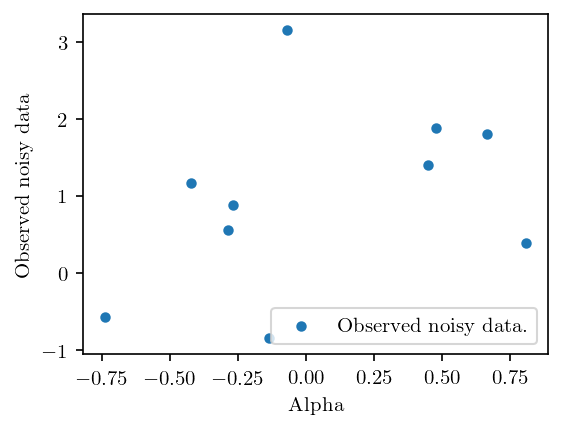

In [8]:
n = 10 # Number of samples
alpha = np.random.uniform(-1, 1, n)
mu = 0
variance = 1
z_i = np.random.normal(mu, variance, n)
w = np.array([1, 1])
y_true = w[0] * alpha + w[1]
y_i = y_true + z_i

'''
Plot data for visualization
'''
fig, ax = plt.subplots()
ax.scatter(alpha, y_i, label='Observed noisy data.')
plt.xlabel('Alpha')
plt.ylabel('Observed noisy data')
plt.legend()
plt.show()

Begin the simulation:

For degree of polynomials being fitted in range: $[1,9]$, and for number of samples in the range: $[10, 50]$, evenly spaced by step size of 10.

Evaluate mean square error for each configuration of N and D. To provide reliability to the MSE value, for each configuration, take the mean of MSE after running simulation 1000 times.

In [0]:
'''
Now add method for evaluating error for polynomial fitting for a given number of
samples and given degree of ploynomial.
'''
def polynomial_fit(D, N):
  alpha = np.random.uniform(-1, 1, N) # generate samples in interval [-1, 1] uniformly
  y_true = 1 * alpha + 1 # for w0 = 1 and w1 = 1, calculate true y.
  y = y_true + np.random.normal(0, 1, N) # evaluate noisy observed data.
  poly_coeff = np.polyfit(alpha, y, D) # fit a D degree polynomial to data.
  poly_fit = np.poly1d(poly_coeff) # Fitted polynomial as a smooth function. 
  return ((poly_fit(alpha) - y_true) ** 2).mean() # Return evaluated average error.

Ds = list(range(1, 10)) # range of degrees to try polynomial fitting from.
Ns = list(range(10, 60, 10)) # Number of samples for each experiment.

error = np.zeros((len(Ns), len(Ds)))

'''
Simulation below:

Obtain mean squared errors after running 1000 simulations for a given 
configuration of degree of polynomial and number of samples.
'''
num_iterations = 1000 # number of iterartions in every polynomial degree and number of samples configuration.
for N_idx, N in enumerate(Ns):
  for D_idx, D in enumerate(Ds):
    error[N_idx, D_idx] = np.mean([polynomial_fit(D, N) for _ in range(num_iterations)])

Visualization of mean squared error as a function of the degree of the polynomial being fitted.

Note: as degree of polynomial increases, so does the error in prediction.

\begin{equation}
\frac{1}{n}\mathop{\mathbb{E}}[\|X\hat{w}-y^*\|_2^2] = \frac{1}{n}\sigma^2(D+1)
\end{equation}

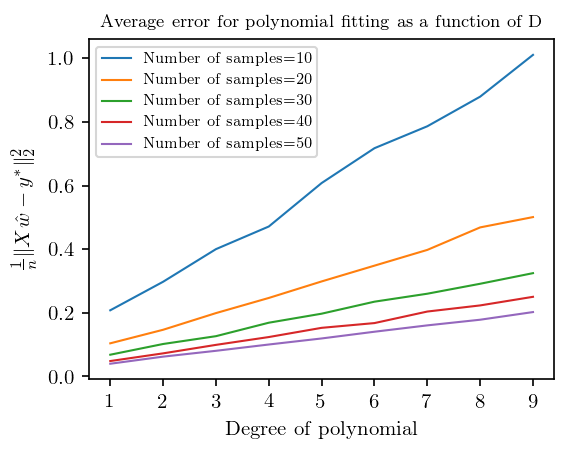

In [10]:

fig1, ax1 = plt.subplots()
plt.rcParams['font.size'] = 7
for N_idx, N in enumerate(Ns):
    ax1.plot(Ds, error[N_idx, :], label='Number of samples=$%d$' % N)

plt.title('Average error for polynomial fitting as a function of D')
plt.ylabel(r'$\frac{1}{n}\| X\hat{w} - y^*\|_2^2$')
plt.xlabel('Degree of polynomial')
plt.legend()
plt.show()

Visualization of mean squared error as a function of the number of samples.

Note: as the number of samples increases, the error in prediction decreases.

\begin{equation}
\frac{1}{n}\mathop{\mathbb{E}}[\|X\hat{w}-y^*\|_2^2] = \frac{1}{n}\sigma^2(D+1)
\end{equation}

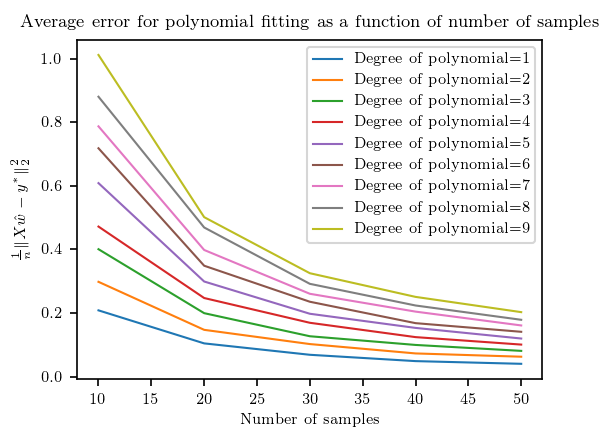

In [11]:
fig2, ax2 = plt.subplots()
plt.rcParams['font.size'] = 7
for D_idx, D in enumerate(Ds):
    ax2.plot(Ns, error[:, D_idx], label='Degree of polynomial=$%d$' % D)

plt.title('Average error for polynomial fitting as a function of number of samples')
plt.ylabel(r'$\frac{1}{n}\| X\hat{w} - y^*\|_2^2$')
plt.xlabel('Number of samples')
plt.legend()
plt.show()

Now, consider a new underlying model defined for scalar samples $\{\alpha_i, y_i\}_{i=1}^n$ as below:

\begin{equation}
y_i = e^{\alpha_i} + z_i
\end{equation}

with the samples drawn from the interval $[-4, 3]$ uniformly.

1. First Initialize samples and visualise them for $n = 120$

Just a random initialization and visualizatio of corresponding data.



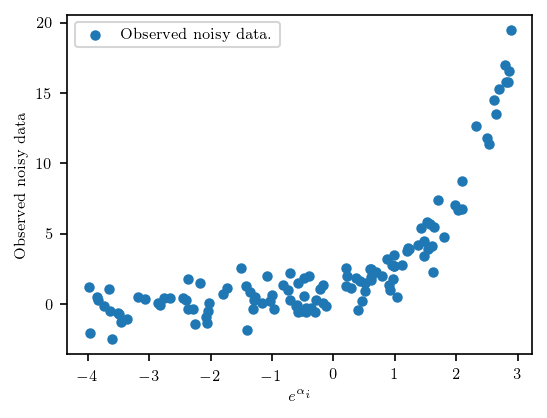

In [16]:
n_1 = 120 # Number of samples
alpha_1 = np.random.uniform(-4, 3, n_1)
mu_1 = 0
variance_1 = 1
z_i_1 = np.random.normal(mu_1, variance_1, n_1)
y_true_1 = np.exp(alpha_1)
y_i_1 = y_true_1 + z_i_1

'''
Plot data for visualization
'''
fig3, ax3 = plt.subplots()
ax3.scatter(alpha_1, y_i_1, label='Observed noisy data.')
plt.xlabel(r'$e^{\alpha_i}$')
plt.ylabel('Observed noisy data')
plt.legend()
plt.show()

Define the polynomial fit as a function and begin the simulation to determine the nature of average error as a function of both D and n.

In [0]:
'''
Now add method for evaluating error for polynomial fitting for a given number of
samples and given degree of ploynomial.
'''
def polynomial_fit(D, N):
  alpha = np.random.uniform(-4, 3, N) # generate samples in interval [-4, 3] uniformly
  y_true = np.exp(alpha) # for y = exp(alpha)
  y = y_true + np.random.normal(0, 1, N) # evaluate noisy observed data.
  poly_coeff = np.polyfit(alpha, y, D) # fit a D degree polynomial to data.
  poly_fit = np.poly1d(poly_coeff) # Fitted polynomial as a smooth function. 
  return ((poly_fit(alpha) - y_true) ** 2).mean() # Return evaluated average error.

Ds = list(range(1, 7)) # range of degrees to try polynomial fitting from.
Ns = list(range(50, 130, 10)) # Number of samples for each experiment.

error = np.zeros((len(Ns), len(Ds)))

'''
Simulation below:

Obtain mean squared errors after running 1000 simulations for a given 
configuration of degree of polynomial and number of samples.
'''
num_iterations = 1000 # number of iterartions in every polynomial degree and number of samples configuration.
for N_idx, N in enumerate(Ns):
  for D_idx, D in enumerate(Ds):
    error[N_idx, D_idx] = np.mean([polynomial_fit(D, N) for _ in range(num_iterations)])

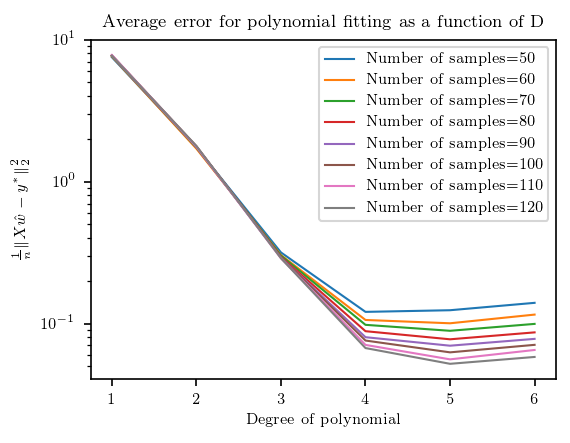

In [26]:
fig4, ax4 = plt.subplots()
plt.rcParams['font.size'] = 7
for N_idx, N in enumerate(Ns):
    ax4.semilogy(Ds, error[N_idx, :], label='Number of samples=$%d$' % N)

plt.title('Average error for polynomial fitting as a function of D')
plt.ylabel(r'$\frac{1}{n}\| X\hat{w} - y^*\|_2^2$')
plt.xlabel('Degree of polynomial')
plt.legend()
plt.show()

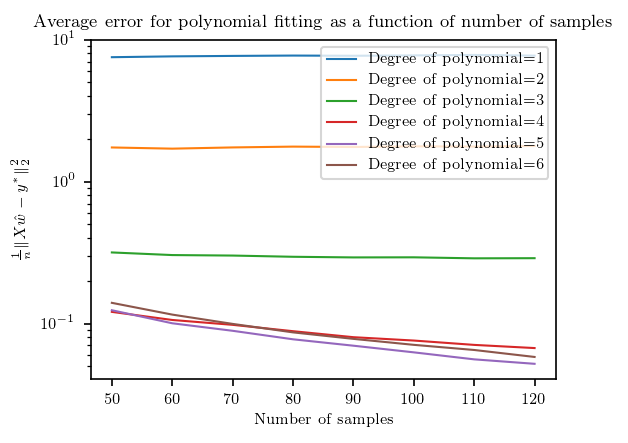

In [27]:
fig5, ax5 = plt.subplots()
plt.rcParams['font.size'] = 7
for D_idx, D in enumerate(Ds):
    ax5.semilogy(Ns, error[:, D_idx], label='Degree of polynomial=$%d$' % D)

plt.title('Average error for polynomial fitting as a function of number of samples')
plt.ylabel(r'$\frac{1}{n}\| X\hat{w} - y^*\|_2^2$')
plt.xlabel('Number of samples')
plt.legend()
plt.show()